In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
https://insights.stackoverflow.com/survey

In [2]:
results_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv", index_col='ResponseId')
schema_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_schema.csv", index_col='qname')

In [3]:
# check the question corresponding to the column name
schema_df.loc['YearsCodePro', 'question']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

# Developer Profile
https://survey.stackoverflow.co/2023/#developer-profile

## Education

#### All respondents
https://survey.stackoverflow.co/2023/#developer-profile-education

In [4]:
print('Responses: ',results_df.shape[0])

Responses:  89184


<Axes: >

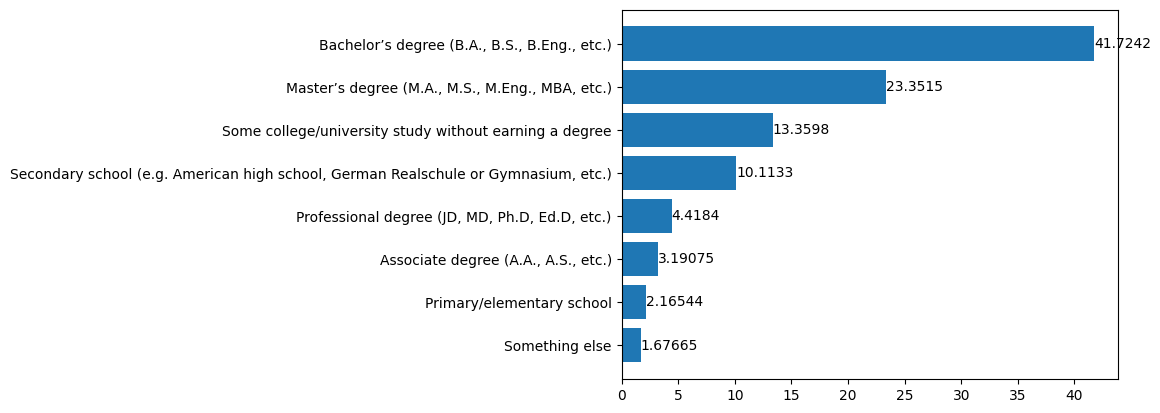

In [5]:
info_df = results_df['EdLevel'].value_counts(normalize=True).sort_values(ascending=True)*100

fig, ax = plt.subplots()
bars = ax.barh(info_df.index, info_df.values)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#education-ed-level-prof

In [6]:
pro_df = results_df[results_df['MainBranch'].str.contains('I am a developer by profession', na=False)]
print('Responses: ',pro_df.shape[0])

Responses:  67237


<Axes: >

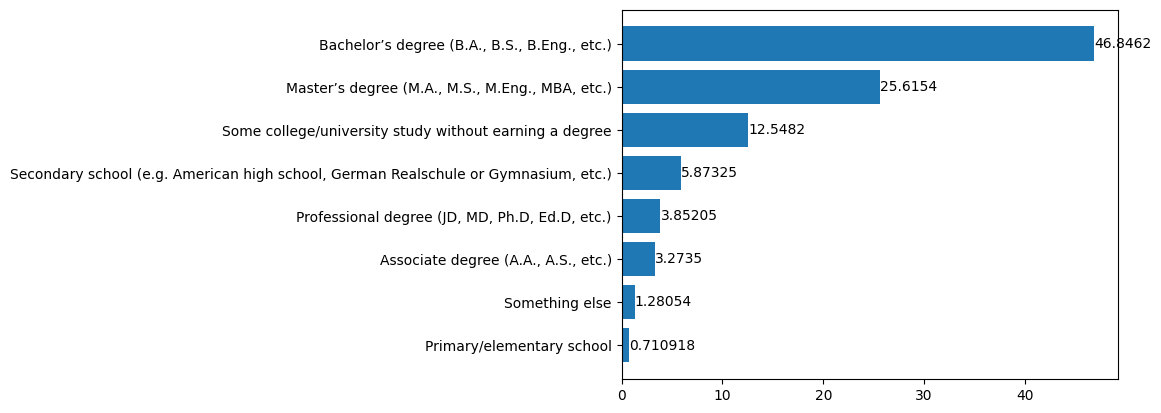

In [7]:
info_df = pro_df['EdLevel'].value_counts(normalize=True).sort_values(ascending=True)*100

fig, ax = plt.subplots()
bars = ax.barh(info_df.index, info_df.values)
ax.bar_label(bars)
ax

#### Learning to code
https://survey.stackoverflow.co/2023/#education-ed-level-learn

In [8]:
learning_to_df = results_df[results_df['MainBranch'].str.contains('I am learning to code', na=False)]
print('Responses: ',learning_to_df.shape[0])

Responses:  4961


<Axes: >

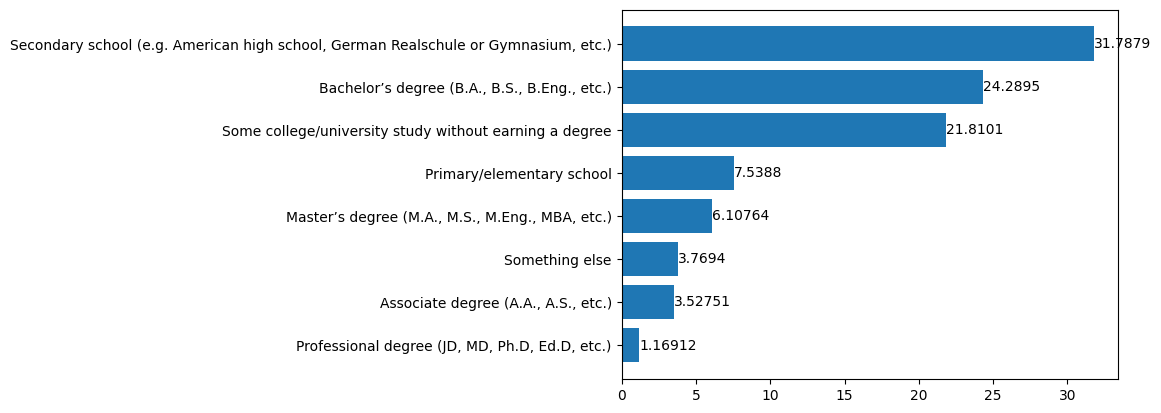

In [9]:
info_df = learning_to_df['EdLevel'].value_counts(normalize=True).sort_values(ascending=True)*100

fig, ax = plt.subplots()
bars = ax.barh(info_df.index, info_df.values)
ax.bar_label(bars)
ax

#### Other Coders
https://survey.stackoverflow.co/2023/#education-ed-level-other

## Learning how to code

#### Learning how to code
https://survey.stackoverflow.co/2023/#learning-to-code-learn-code

In [10]:
responses = results_df['LearnCode'].dropna().shape[0]
print('Responses: ', responses)

# create a lisr of each unique learning platform 
learn_code_platform = []
for items in results_df['LearnCode'].dropna().unique():
    for item in items.split(';'):
        if item in learn_code_platform:
            pass
        else:
            learn_code_platform.append(item)

# create a list of counts of each platforms
learn_code_counts = []
for item in learn_code_platform:
    val = results_df[results_df['LearnCode'].str.contains(item, na=False, regex=False)].shape[0]
    learn_code_counts.append(val)

# create a list of % from all respondent
learn_code_parcentage = (np.array(learn_code_counts)/responses)*100

# create dataframe of platform and parcentage
learning_df = pd.DataFrame({'Platform': learn_code_platform, 'Counts': learn_code_parcentage}).sort_values(by='Counts', ascending=True)

Responses:  87663


<Axes: >

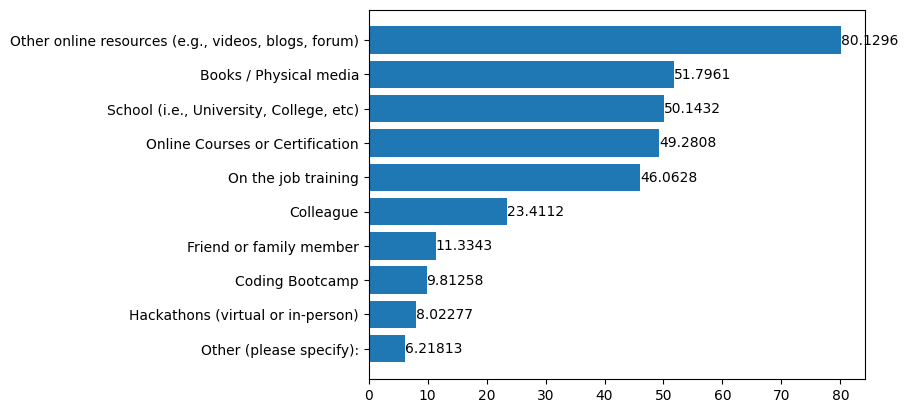

In [11]:
fig, ax = plt.subplots()
bars = ax.barh(learning_df['Platform'], learning_df['Counts'])
ax.bar_label(bars)
ax

#### Learning to code
https://survey.stackoverflow.co/2023/#learning-to-code-learn-code-learn

In [12]:
responses = learning_to_df['LearnCode'].dropna().shape[0]
print('Responses: ', responses)

# list of unique values from LearnCode
# LearnCode values contain multiple values seperated by ;
learn_code_platform = []
for items in learning_to_df['LearnCode'].dropna().unique():
    for item in items.split(';'):
        if item in learn_code_platform:
            pass
        else:
            learn_code_platform.append(item)

# create a list of counts of each platforms
learn_code_counts = []
for item in learn_code_platform:
    val = learning_to_df[learning_to_df['LearnCode'].str.contains(item, na=False, regex=False)].shape[0]
    learn_code_counts.append(val)

# create a list of % from all respondent
learn_code_parcentage = (np.array(learn_code_counts)/responses)*100

# create dataframe of platform and parcentage
learning_df = pd.DataFrame({'Platform': learn_code_platform, 'Counts': learn_code_parcentage}).sort_values(by='Counts', ascending=True)

Responses:  4947


<Axes: >

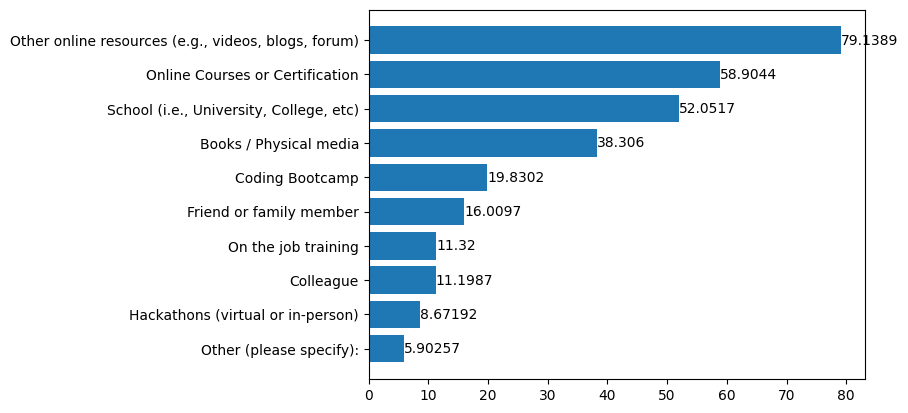

In [13]:
fig, ax = plt.subplots()
bars = ax.barh(learning_df['Platform'], learning_df['Counts'])
ax.bar_label(bars)
ax

#### Learn code by Age
https://survey.stackoverflow.co/2023/#learning-to-code-learn-code-age

In [14]:
# plan of attack is to get a dataframe that contain 
# counts for each unique LearnCode/Platform of different each Age range
# so that we can use pandas MultiIndex / advanced indexing &
# .describe() function to get the same results like stackoverflow

# create a new dataframe of required columns
age_df = results_df[['LearnCode', 'Age']].dropna()

# define empty dataframe
# 
info_df = pd.DataFrame()

# learn_code_platform is list of unique values of platforms
for item in learn_code_platform:
    # create a new of described group
    # groups of ages & item counts 
    age_grp_df = age_df[age_df['LearnCode'].str.contains(item, na=False, regex=False)].groupby('Age').describe()
    # print(age_grp_df)

    # this temporary dataframe only used for concat to info_df
    # columns Age, Counts, Platforms
    temp_df = pd.DataFrame()
    temp_df['Age'], temp_df['Counts'] = age_grp_df[('LearnCode',  'count')].index, age_grp_df[('LearnCode', 'count')].values

    # platforms is replacement of LearnCode
    # platforms column contain the item
    # in dataset LearnCode contain multiple ; seperated values
    temp_df['Platforms'] = item
    info_df = pd.concat([info_df, temp_df], axis=0)

# applying MultiIndex / advanced indexing & describe()
info_df = info_df.groupby(by=['Age', 'Platforms']).describe()

In [15]:
# this is a list of dictionary which contain splited dataframe for each Age range
# this list used for ploting
lst_of_df = []
for age in results_df['Age'].unique():
    # age as a key &
    # filtered dataframe of Platforms and Age columns
    lst_of_df.append({age : info_df.loc[age][('Counts', 'top')]})

# info_df.loc['18-24 years old'][('Counts', 'top')]

Age range:  18-24 years old


<Axes: >

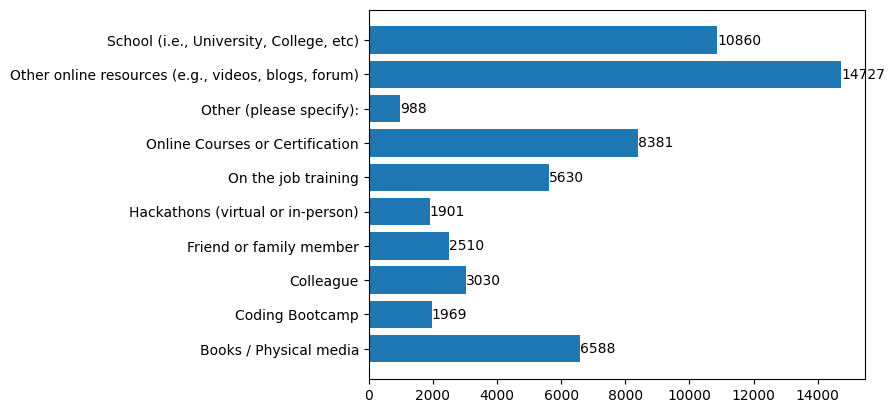

In [16]:
fig, ax = plt.subplots()

# select first dict from lst_of_df
tem_df = lst_of_df[0]
# extract the key name
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  25-34 years old


<Axes: >

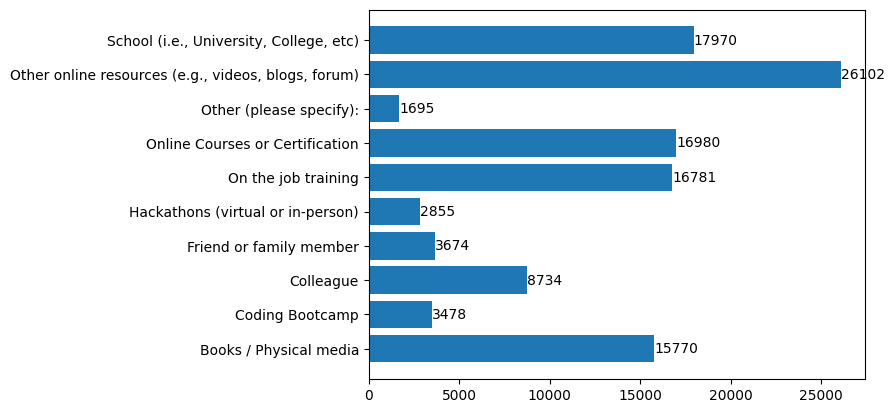

In [17]:
fig, ax = plt.subplots()
tem_df = lst_of_df[1]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  45-54 years old


<Axes: >

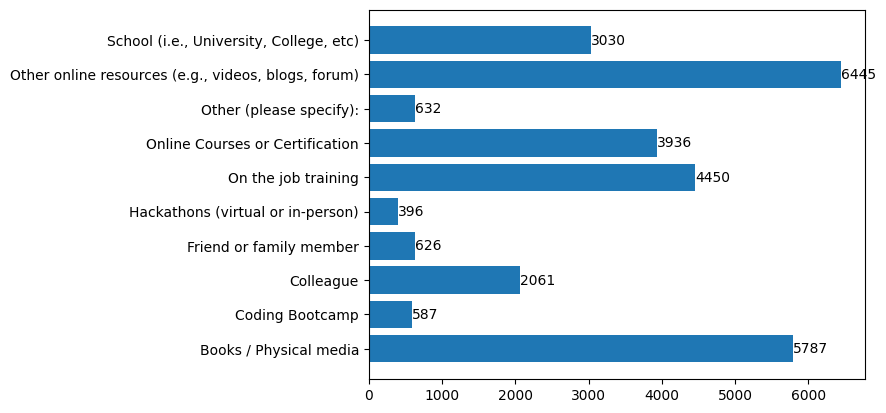

In [18]:
fig, ax = plt.subplots()
tem_df = lst_of_df[2]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  35-44 years old


<Axes: >

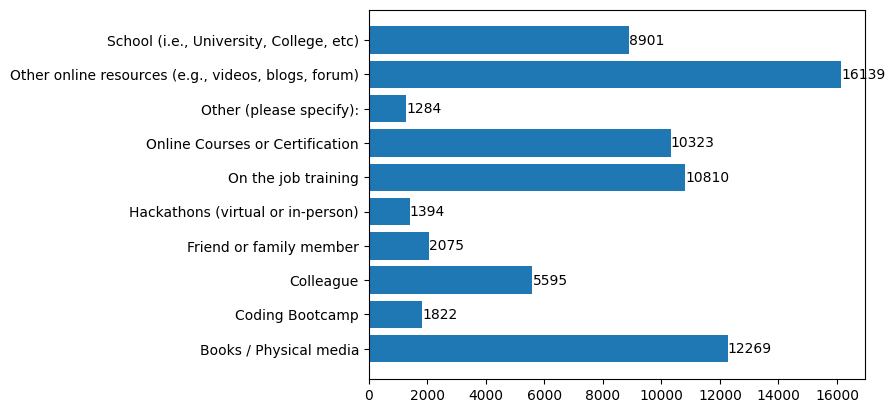

In [19]:
fig, ax = plt.subplots()
tem_df = lst_of_df[3]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  Under 18 years old


<Axes: >

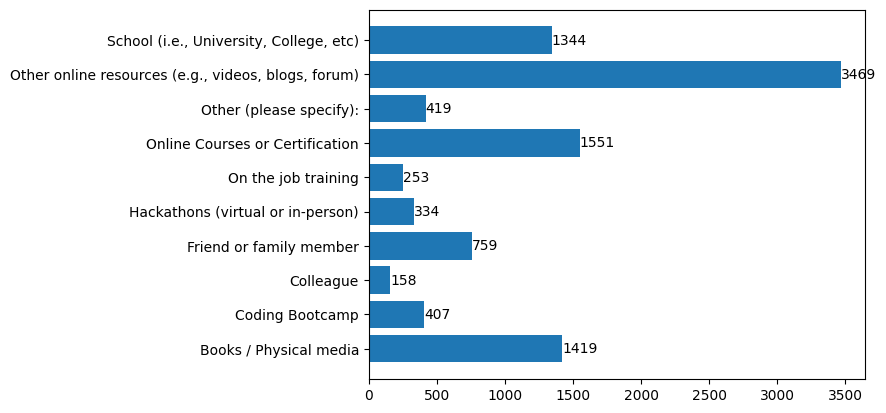

In [20]:
fig, ax = plt.subplots()
tem_df = lst_of_df[4]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  55-64 years old


<Axes: >

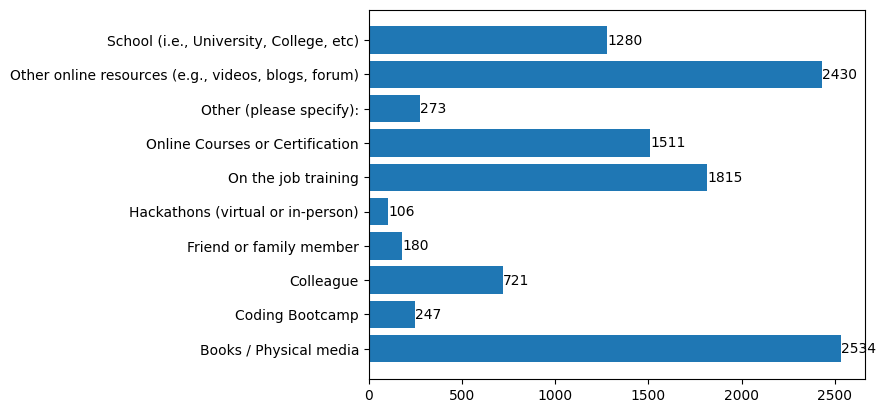

In [21]:
fig, ax = plt.subplots()
tem_df = lst_of_df[5]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  65 years or older


<Axes: >

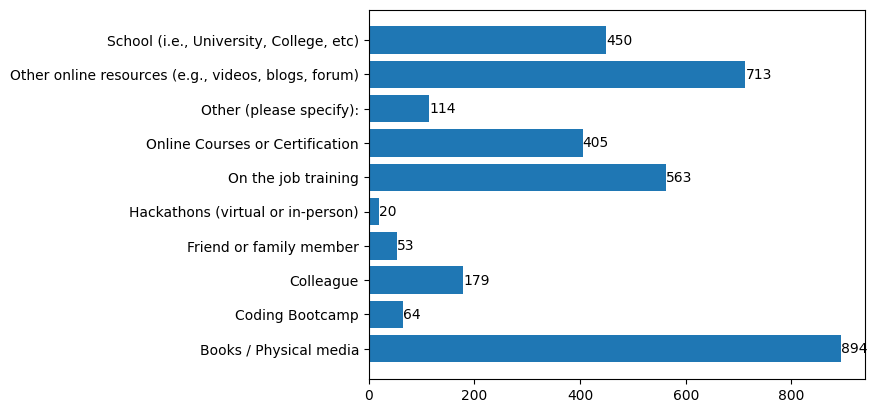

In [22]:
fig, ax = plt.subplots()
tem_df = lst_of_df[6]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

Age range:  Prefer not to say


<Axes: >

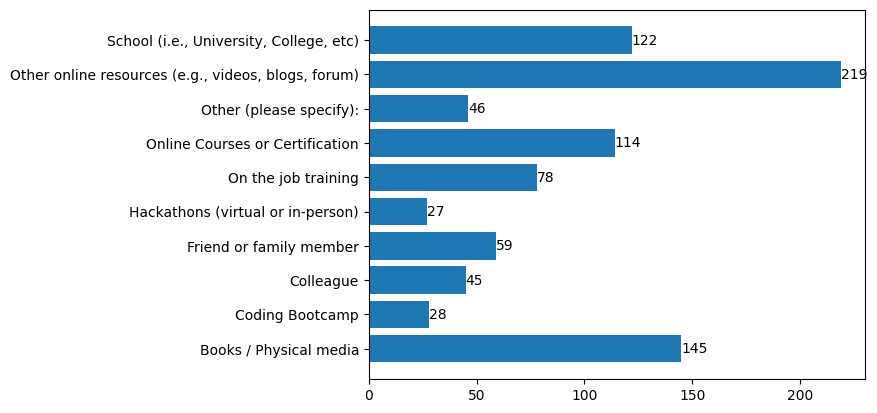

In [23]:
fig, ax = plt.subplots()
tem_df = lst_of_df[7]
key = list(tem_df.keys())[0]

bars = ax.barh(tem_df[key].index, tem_df[key].values)
ax.bar_label(bars)
print('Age range: ',key)
ax

## Experience

#### All Respondent
https://survey.stackoverflow.co/2023/#experience-years-code

In [24]:
responses = results_df['YearsCode'].dropna().shape[0]
print('Responses: ', responses)

# counts for each given age
years_df = results_df['YearsCode'].dropna().value_counts()
years_df = pd.DataFrame({'Years': years_df.index, 'Counts': years_df.values})
years_df.set_index('Years', inplace=True)

# create variable to update all age counts for a age group
years_1_to_4 = 0
years_5_to_9 = 0
years_10_to_14 = 0
years_15_to_19 = 0
years_20_to_24 = 0
years_25_to_29 = 0
years_30_to_34 = 0
years_35_to_39 = 0
years_40_to_44 = 0
years_45_to_49 = 0
Less_than_1_year = years_df.loc['Less than 1 year', 'Counts']
More_than_50_years = years_df.loc['More than 50 years', 'Counts']

# drop string values
years_df.drop(index=['Less than 1 year', 'More than 50 years'], inplace=True)

Responses:  87435


In [25]:
for _ in years_df.index:
    val = int(_)
    # counts for a age
    counts = years_df.loc[_, 'Counts']

    # check which age fall into which age group
    # update the variable for each ages in group
    if val in range(1,5):
        years_1_to_4 += counts
    elif val in range(5,10):
        years_5_to_9 += counts
    elif val in range(10,15):
        years_10_to_14 += counts
    elif val in range(15,20):
        years_15_to_19 += counts
    elif val in range(20,25):
        years_20_to_24 += counts
    elif val in range(25,30):
        years_25_to_29 += counts
    elif val in range(30,35):
        years_30_to_34 += counts
    elif val in range(35,40):
        years_35_to_39 += counts
    elif val in range(40,45):
        years_40_to_44 += counts
    elif val in range(45,50):
        years_45_to_49 += counts
    elif val == np.nan:
        pass

<Axes: >

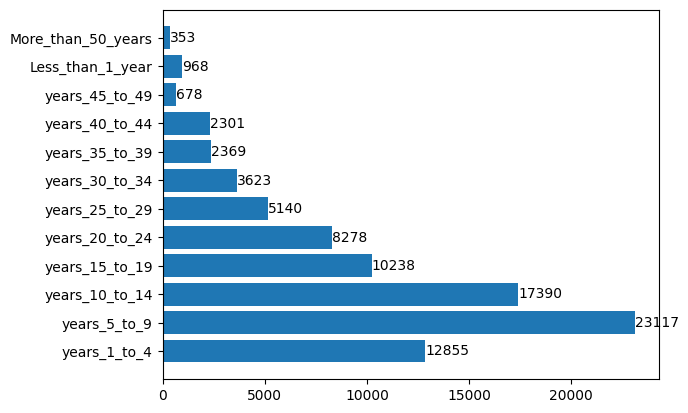

In [26]:
age_grp_list = ['years_1_to_4', 'years_5_to_9', 'years_10_to_14', 'years_15_to_19', 'years_20_to_24', 'years_25_to_29', 'years_30_to_34', 'years_35_to_39', 'years_40_to_44', 'years_45_to_49', 'Less_than_1_year', 'More_than_50_years']
age_grp_counts = [years_1_to_4, years_5_to_9, years_10_to_14, years_15_to_19, years_20_to_24, years_25_to_29, years_30_to_34, years_35_to_39, years_40_to_44, years_45_to_49, Less_than_1_year, More_than_50_years]

fig, ax = plt.subplots()

bars = ax.barh(age_grp_list, age_grp_counts)
ax.bar_label(bars)
ax

#### Years coding professionally
https://survey.stackoverflow.co/2023/#years-coding-professionally

In [27]:
responses = results_df['YearsCodePro'].dropna().shape[0]
print('Responses: ', responses)

# counts for each given age
years_df = results_df['YearsCodePro'].dropna().value_counts()
years_df = pd.DataFrame({'Years': years_df.index, 'Counts': years_df.values})
years_df.set_index('Years', inplace=True)

Responses:  66136


In [28]:
# create variable to update all age counts for a age group
years_1_to_4 = 0
years_5_to_9 = 0
years_10_to_14 = 0
years_15_to_19 = 0
years_20_to_24 = 0
years_25_to_29 = 0
years_30_to_34 = 0
years_35_to_39 = 0
years_40_to_44 = 0
years_45_to_49 = 0
Less_than_1_year = years_df.loc['Less than 1 year', 'Counts']
More_than_50_years = years_df.loc['More than 50 years', 'Counts']

# drop string values
years_df.drop(index=['Less than 1 year', 'More than 50 years'], inplace=True)

for _ in years_df.index:
    val = int(_)
    # counts for a age
    counts = years_df.loc[_, 'Counts']

    # check which age fall into which age group
    # update the variable for each ages in group
    if val in range(1,5):
        years_1_to_4 += counts
    elif val in range(5,10):
        years_5_to_9 += counts
    elif val in range(10,15):
        years_10_to_14 += counts
    elif val in range(15,20):
        years_15_to_19 += counts
    elif val in range(20,25):
        years_20_to_24 += counts
    elif val in range(25,30):
        years_25_to_29 += counts
    elif val in range(30,35):
        years_30_to_34 += counts
    elif val in range(35,40):
        years_35_to_39 += counts
    elif val in range(40,45):
        years_40_to_44 += counts
    elif val in range(45,50):
        years_45_to_49 += counts
    elif val == np.nan:
        pass

<Axes: >

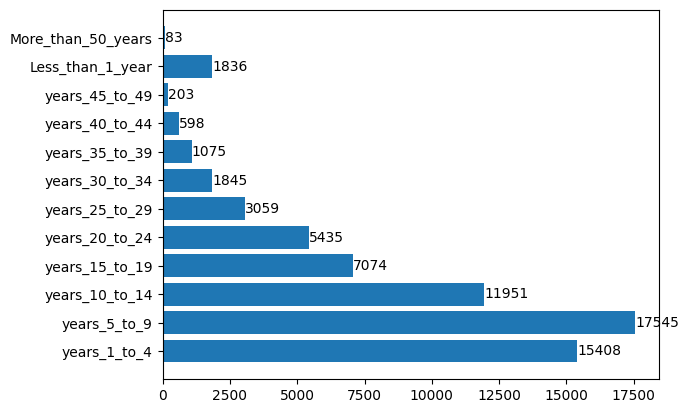

In [29]:
age_grp_list = ['years_1_to_4', 'years_5_to_9', 'years_10_to_14', 'years_15_to_19', 'years_20_to_24', 'years_25_to_29', 'years_30_to_34', 'years_35_to_39', 'years_40_to_44', 'years_45_to_49', 'Less_than_1_year', 'More_than_50_years']
age_grp_counts = [years_1_to_4, years_5_to_9, years_10_to_14, years_15_to_19, years_20_to_24, years_25_to_29, years_30_to_34, years_35_to_39, years_40_to_44, years_45_to_49, Less_than_1_year, More_than_50_years]

fig, ax = plt.subplots()

bars = ax.barh(age_grp_list, age_grp_counts)
ax.bar_label(bars)
ax

#### Years of professional coding experience by developer type
https://survey.stackoverflow.co/2023/#years-of-professional-coding-experience-by-developer-type

In [30]:
responses = results_df['YearsCodePro'].dropna().shape[0]
print('Responses: ', responses)

pro_df = results_df.loc[..., ['YearsCodePro', 'DevType']]
pro_df.replace(['Less than 1 year', 'More than 50 years'], [np.nan, np.nan], inplace=True)

pro_df = pro_df.groupby('DevType').describe()

Responses:  66136


<Axes: >

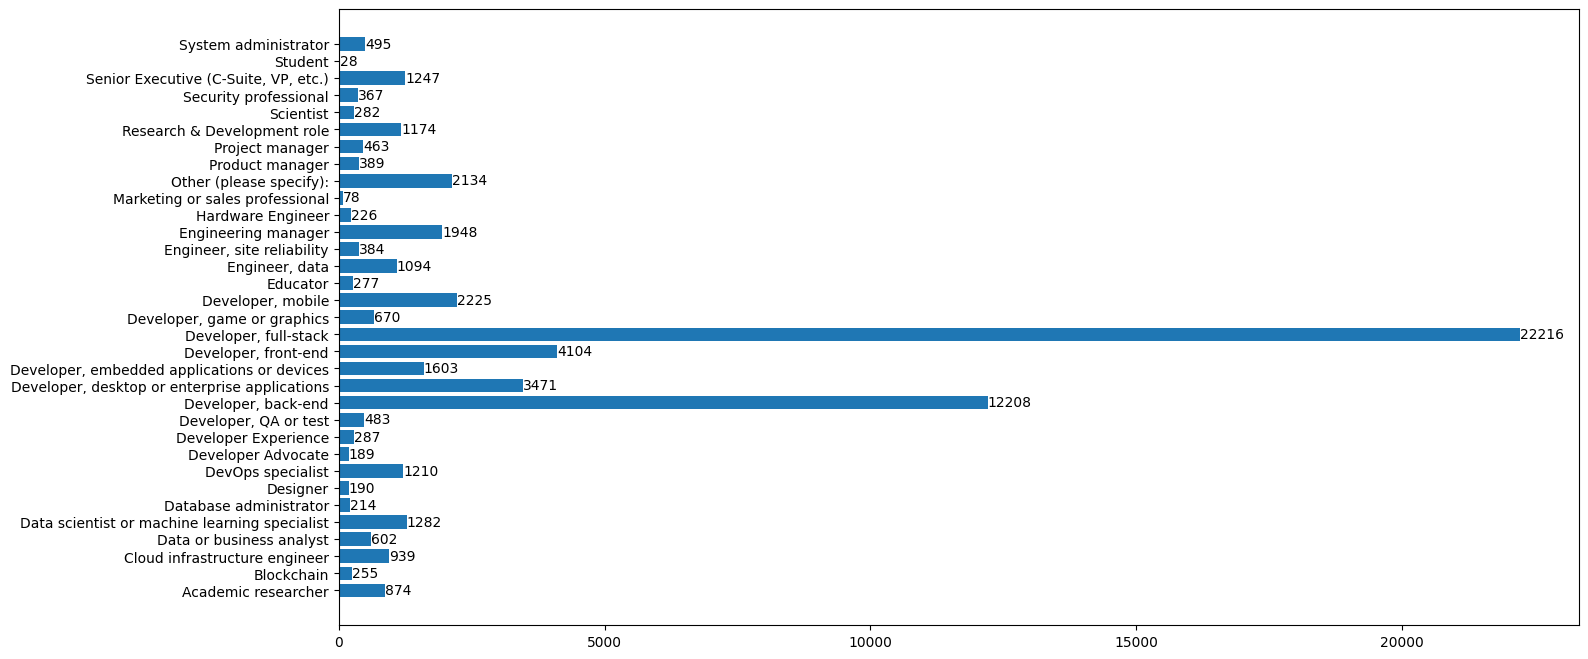

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.barh(pro_df.index, pro_df[('YearsCodePro',  'count')])
ax.bar_label(bars)
ax

#### Top countries
https://survey.stackoverflow.co/2023/#experience-years-code-country

In [32]:
# list of countries want to filter
countries = ['Australia', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Canada', 'Netherlands', 'Germany', 'France', 'Brazil', 'Poland', 'India']

# apply the list of countries in filter
country_flt = results_df['Country'].isin(countries)

# # create a new dataframe of filtered results
country_df = results_df.loc[country_flt, ['YearsCode', 'Country']]
print('Responses:', country_df['YearsCode'].dropna().shape[0])

country_df.replace(['Less than 1 year', 'More than 50 years'], [np.nan, np.nan], inplace=True)
country_df = country_df.dropna().groupby('Country').describe()

Responses: 52244


<Axes: >

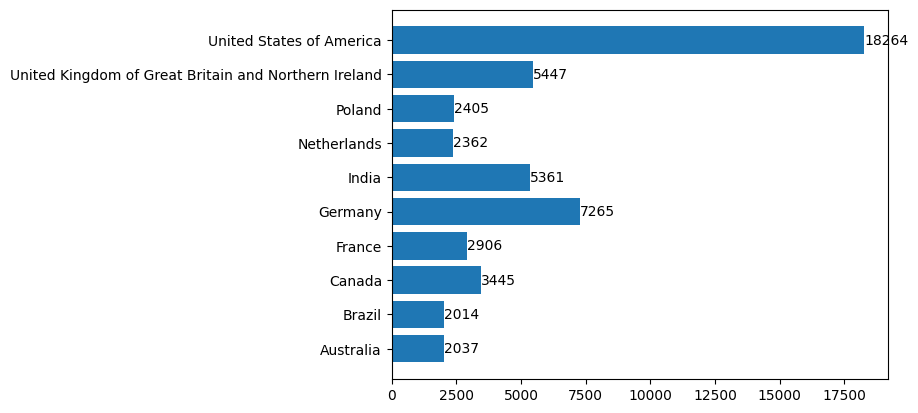

In [33]:
fig, ax = plt.subplots()

bars = ax.barh(country_df.index, country_df[('YearsCode',  'count')])
ax.bar_label(bars)
ax

## Developer roles

#### Developer type
https://survey.stackoverflow.co/2023/#developer-type

Responses: 76872


<Axes: >

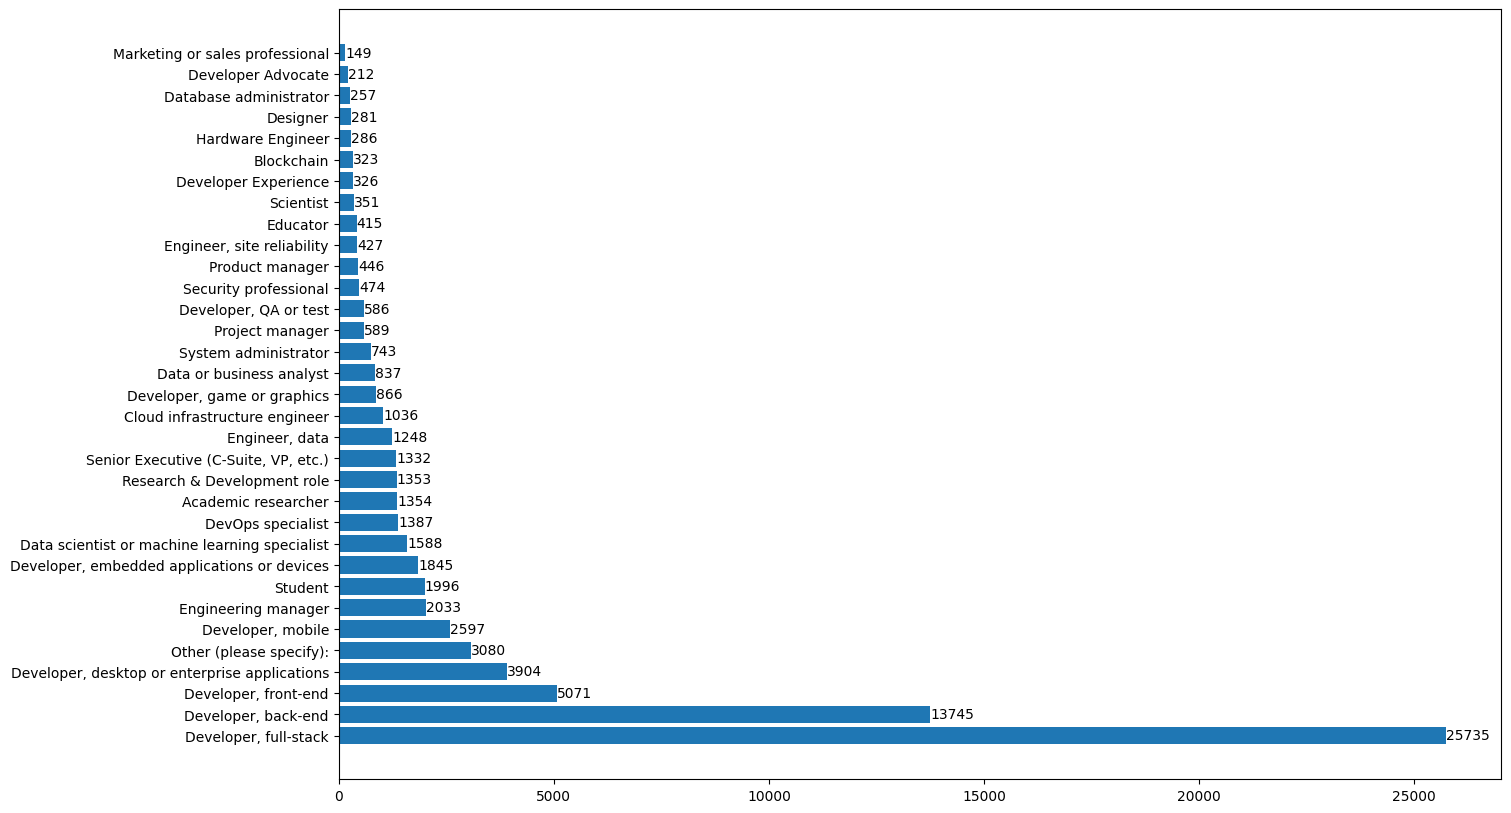

In [34]:
print('Responses:', results_df['DevType'].dropna().shape[0])

dev_type_df = results_df['DevType'].value_counts()

fig, ax = plt.subplots(figsize=(15, 10))

bars = ax.barh(dev_type_df.index, dev_type_df.values)
ax.bar_label(bars)
ax

## Key territories

#### Top 10 Countries
https://survey.stackoverflow.co/2023/#key-territories-country

Response: 52530


<Axes: >

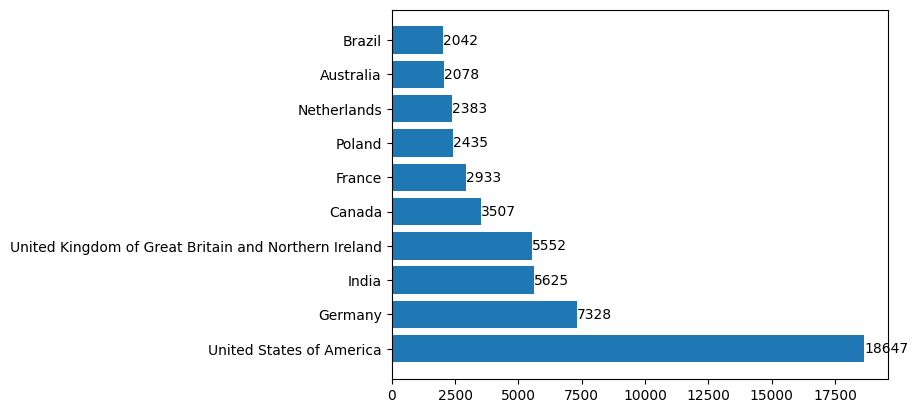

In [35]:
geography_df = results_df['Country'].value_counts().nlargest(10)
print('Response:', sum(geography_df.values))

fig, ax = plt.subplots()

bars = ax.barh(geography_df.index, geography_df.values)
ax.bar_label(bars)
ax

#### All Countries
https://survey.stackoverflow.co/2023/#key-territories-all-countries

In [36]:
responses = results_df['Country'].value_counts().values.sum()
print('Responses:', responses)

# results_df['Country'].value_counts().apply(lambda x : (x/responses)*100)

all_country_df = pd.DataFrame({
                               'Counts': results_df['Country'].value_counts().values,
                               'Percentage': results_df['Country'].value_counts().apply(lambda x : (x/responses)*100)
                              })
all_country_df.head(15)

Responses: 87973


,Counts,Percentage
Country,,
United States of America,18647,21.196276
Germany,7328,8.329828
India,5625,6.394007
United Kingdom of Great Britain and Northern Ireland,5552,6.311027
Canada,3507,3.986450
France,2933,3.333977
Poland,2435,2.767895
Netherlands,2383,2.708786
Australia,2078,2.362088


## Demographics

#### All Respondents
https://survey.stackoverflow.co/2023/#demographics-age

Responses: 89184


<Axes: >

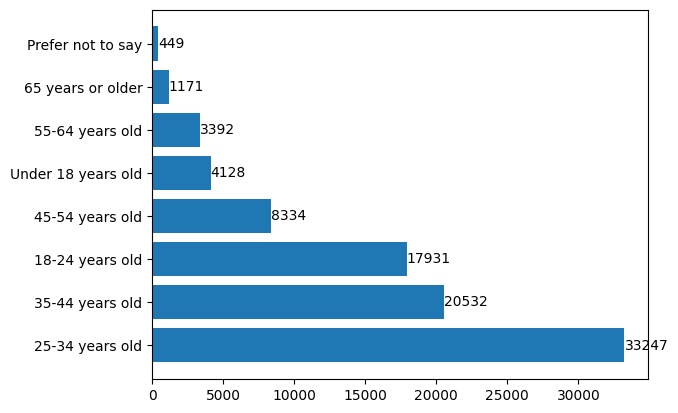

In [37]:
print('Responses:', results_df['Age'].dropna().shape[0])

age_df = results_df['Age'].value_counts()

fig, ax = plt.subplots()

bars = ax.barh(age_df.index, age_df.values)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#demographics-age-prof

<Axes: >

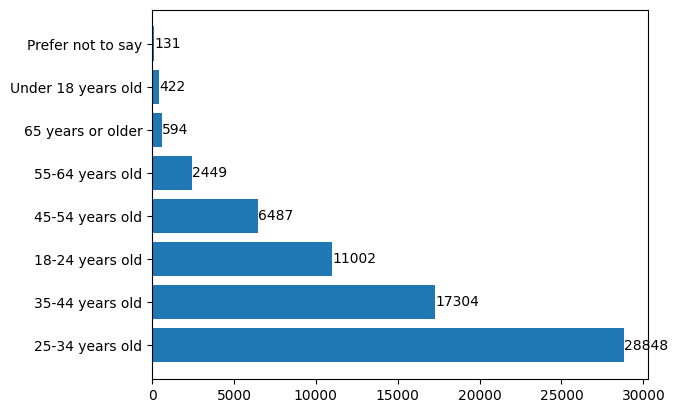

In [38]:
pro_dev_df = results_df.loc[results_df['MainBranch'].str.contains('I am a developer by profession'), ['MainBranch', 'Age']]

fig, ax = plt.subplots()

bars = ax.barh(pro_dev_df['Age'].value_counts().index, pro_dev_df['Age'].value_counts().values)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#demographics-age-learn

<Axes: >

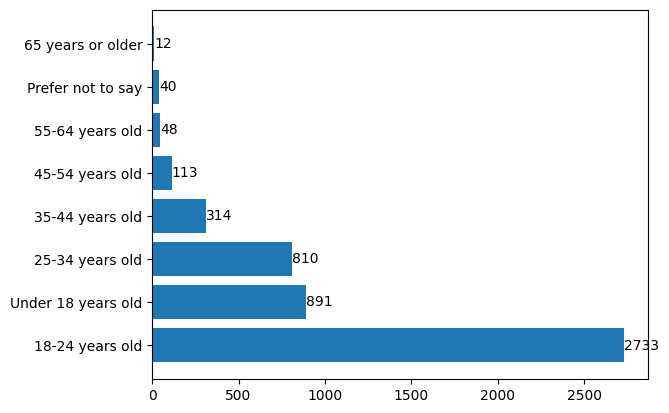

In [40]:
pro_dev_df = results_df.loc[results_df['MainBranch'].str.contains('I am learning to code'), ['MainBranch', 'Age']]

fig, ax = plt.subplots()

bars = ax.barh(pro_dev_df['Age'].value_counts().index, pro_dev_df['Age'].value_counts().values)
ax.bar_label(bars)
ax

#### Other Coders
https://survey.stackoverflow.co/2023/#demographics-age-other

In [41]:
for _ in results_df['MainBranch'].unique():
    print(_, ':', results_df.loc[results_df['MainBranch'].str.contains(_, regex=False)].shape)

None of these : (1211, 83)
I am a developer by profession : (67237, 83)
I am not primarily a developer, but I write code sometimes as part of my work/studies : (8954, 83)
I code primarily as a hobby : (4960, 83)
I am learning to code : (4961, 83)
I used to be a developer by profession, but no longer am : (1861, 83)
